In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [55]:
# Cargando data en DataFrame

pet_supplies = pd.read_csv('pet_supplies_2212.csv')
pet_supplies #esto igual sirve como 'pet_supplies.shape' porque al final muestra filas x columnas

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
...,...,...,...,...,...,...,...,...
1495,1496,Food,Bird,medium,40.91,1203.36,5.0,0
1496,1497,Equipment,Dog,small,32.89,1099.97,5.0,0
1497,1498,Food,Fish,Small,25.79,724.02,3.0,0
1498,1499,Medicine,Fish,small,19.94,658.66,5.0,1


Tenemos 1500 datos y 8 observaciones

In [56]:
# Checking datatypes and missing values
pet_supplies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


Solo en la columna "rating" tenemos déficit de 150 datos

Cambiaremos los valores en la columna 'size' a minúsculas

In [57]:
pet_supplies['size'] = pet_supplies['size'].str.lower()
pet_supplies.head()


,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,medium,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,small,26.18,832.63,7.0,1


Convertiremos los tipos de datos

In [58]:
pet_supplies['product_id'] = pet_supplies['product_id'].astype(str)

In [59]:
pet_supplies['price'].unique()

array(['51.1', '35.98', '31.23', '24.95', '26.18', '30.77', '31.04',
       '28.9', '17.82', '24.93', '40.87', '34.96', '31.07', '40.8',
       '33.13', '43.09', '28.29', '43.91', '33.87', '44', 'unlisted',
       '41', '32.98', '22.99', '38.99', '45.83', '28.24', '28.19',
       '27.79', '38.86', '22.89', '26.07', '28.02', '23.99', '28.25',
       '30.87', '28.09', '29.01', '26.13', '54.03', '31.2', '30.92',
       '20.95', '17.98', '27.7', '24.8', '31.09', '19.83', '33.15',
       '21.25', '38.06', '30.89', '35.04', '26.03', '33.94', '25.81',
       '32.99', '17.9', '30.96', '40.93', '24.98', '26.08', '23.08', '26',
       '22.95', '39.03', '23.19', '31', '21.05', '31.5', '24.7', '27.76',
       '18.06', '28.43', '43.99', '41.03', '28.28', '25.96', '27.86',
       '38.95', '36.22', '23.02', '21.14', '42.99', '27.95', '38', '28.2',
       '39.16', '25.07', '15', '35.95', '30.03', '22.98', '27.97',
       '28.74', '26.05', '45.99', '25.83', '22.75', '28.03', '29.02',
       '26.32', '2

In [60]:
pet_supplies['price'].replace('unlisted', '0', inplace=True)
pet_supplies['price'] = pet_supplies['price'].astype(float)

In [61]:
pet_supplies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   object 
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 93.9+ KB


In [62]:
pet_supplies['price'].describe()

count    1500.000000
mean       26.481873
std        11.472570
min         0.000000
25%        22.910000
50%        27.930000
75%        33.142500
max        54.160000
Name: price, dtype: float64

In [63]:
pet_supplies['price'].replace(0, 27.93, inplace=True)

In [64]:
# Converting rating to integers

In [65]:
pet_supplies['rating'].unique()

array([ 7.,  6.,  5.,  4.,  8.,  1.,  3., nan,  2.,  9.])

In [66]:
pet_supplies['rating'].replace(np.nan, 0, inplace=True)
pet_supplies['rating'] = pet_supplies['rating'].astype(int)

In [67]:
# Converting 'repeat_purchase' column to string
pet_supplies['repeat_purchase'] = pet_supplies['repeat_purchase'].astype(str)
pet_supplies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   object 
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1500 non-null   int32  
 7   repeat_purchase  1500 non-null   object 
dtypes: float64(2), int32(1), object(5)
memory usage: 88.0+ KB


In [68]:
pet_supplies['category'].unique()

array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       '-'], dtype=object)

In [69]:
pet_supplies['category'].replace('-', 'Unknown', inplace=True)

Data limpiada guardada como .csv file

In [70]:
pet_supplies.to_csv('pet_supp_clean.csv')

Pregunta 1 ¿Qué categoría de la variable 'repeat_purchase' tiene más observaciones?

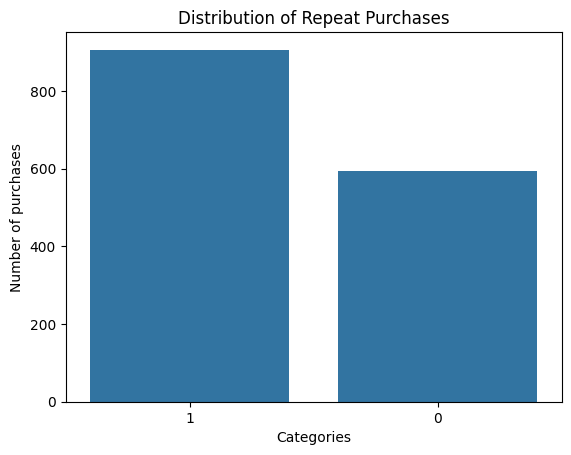

In [71]:
main_color = sns.color_palette()[0]
# plotting the data
sns.countplot(data=pet_supplies, x='repeat_purchase', color=main_color)
plt.title("Distribution of Repeat Purchases")
plt.xlabel("Categories")
plt.ylabel("Number of purchases")
plt.show()

Pregunta 2: Chequea si las observaciones están balanceadas en la categoría de 'repeat_purchases'

In [72]:
new_pet = pet_supplies.loc[pet_supplies['repeat_purchase'] == '1']
new_pet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 906 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       906 non-null    object 
 1   category         906 non-null    object 
 2   animal           906 non-null    object 
 3   size             906 non-null    object 
 4   price            906 non-null    float64
 5   sales            906 non-null    float64
 6   rating           906 non-null    int32  
 7   repeat_purchase  906 non-null    object 
dtypes: float64(2), int32(1), object(5)
memory usage: 60.2+ KB


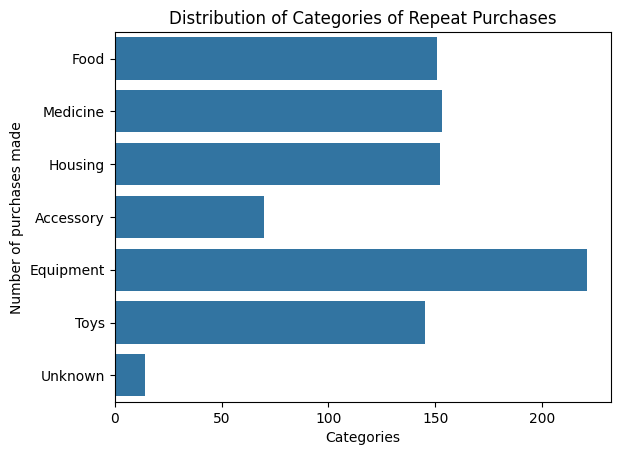

In [73]:
# Plotting the data
sns.countplot(data=new_pet, y='category', color=main_color)
plt.title("Distribution of Categories of Repeat Purchases")
plt.xlabel("Categories")
plt.ylabel("Number of purchases made")
plt.show()

Las categorías no están distribuidas de manera uniforme entre las compras repetidas. Los equipos son los más comprados repetidamente, seguidos por alimentos, medicamentos, vivienda y juguetes. La categoría desconocida es la menos comprada.

Tarea 3: Describe la distribución de todas las ventas

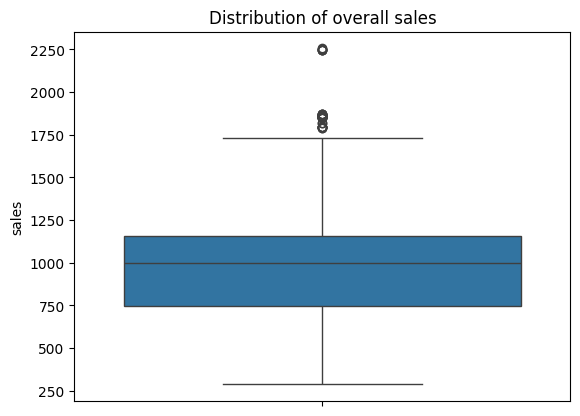

In [74]:
# Plotting the data
sns.boxplot(data=pet_supplies['sales'])
plt.title('Distribution of overall sales')
plt.show()

Las ventas mínimas rondaron los 250, mientras que las máximas llegaron a unos 1750, con algunos valores atípicos por encima del máximo. La mediana de ventas se sitúa en aproximadamente 1000.

Tarea 4: Describe la relación entre 'repeat_purchases' and 'sales'

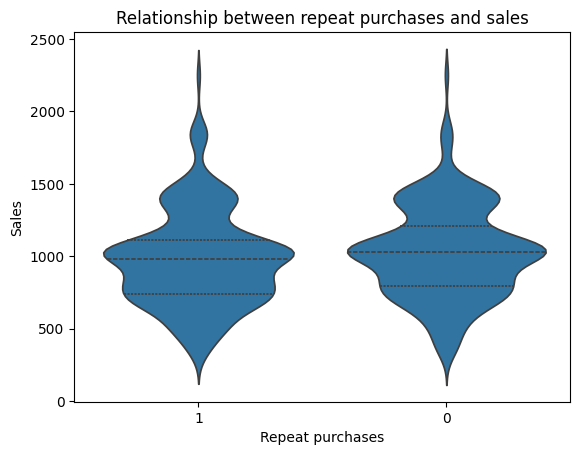

In [75]:
# Plotting the data
sns.violinplot(data=pet_supplies, x='repeat_purchase', y='sales', color=main_color, inner='quartile')
plt.title('Relationship between repeat purchases and sales')
plt.xlabel('Repeat purchases')
plt.ylabel('Sales')
plt.show()


Las ventas se distribuyen de manera similar entre las compras repetidas y las compras únicas